# Importing the Dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, confusion_matrix,\
                            ConfusionMatrixDisplay, roc_curve, auc, classification_report

In [5]:
# Download the dataset
!kaggle competitions download -c titanic

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [6]:
# Import train set
train = pd.read_csv('train.csv')
X_train = train.copy()
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Import test set
test = pd.read_csv('test.csv')
X_test = test.copy()
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Preprocessing

In [8]:
X_train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
X_test.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [10]:
X_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
X_train = X_train.dropna(subset=['Embarked'])
X_train.loc[:, 'Age'] = X_train['Age'].fillna(X_train['Age'].mean())

X_test.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
X_test.loc[:, 'Fare'] = X_test['Fare'].fillna(X_test['Fare'].mean())
X_test.loc[:, 'Age'] = X_test['Age'].fillna(X_test['Age'].mean())

In [11]:
X_train.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [12]:
X_test.isna().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [13]:
X_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
y_train = X_train['Survived']
y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [15]:
X_train.drop(columns=['Survived'], inplace=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    object 
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.6+ KB


In [16]:
# implementing one-hot encoding on the columns "Sex" and "Embarked"
X_train = pd.get_dummies(X_train, columns=['Sex', 'Embarked'])
X_test = pd.get_dummies(X_test, columns=['Sex', 'Embarked'])

In [17]:
# normalizing the columns "Age" and "Fare"
scalar = StandardScaler()
X_train[['Age', 'Fare']] = scalar.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = scalar.transform(X_test[['Age', 'Fare']])

In [18]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,-0.589620,1,0,-0.500240,False,True,False,False,True
1,1,0.644848,1,0,0.788947,True,False,True,False,False
2,3,-0.281003,0,0,-0.486650,True,False,False,False,True
3,1,0.413385,1,0,0.422861,True,False,False,False,True
4,3,0.413385,0,0,-0.484133,False,True,False,False,True


In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      889 non-null    int64  
 1   Age         889 non-null    float64
 2   SibSp       889 non-null    int64  
 3   Parch       889 non-null    int64  
 4   Fare        889 non-null    float64
 5   Sex_female  889 non-null    bool   
 6   Sex_male    889 non-null    bool   
 7   Embarked_C  889 non-null    bool   
 8   Embarked_Q  889 non-null    bool   
 9   Embarked_S  889 non-null    bool   
dtypes: bool(5), float64(2), int64(3)
memory usage: 46.0 KB


In [20]:
len(X_train), len(X_test), len(y_train)

(889, 418, 889)

# EDA

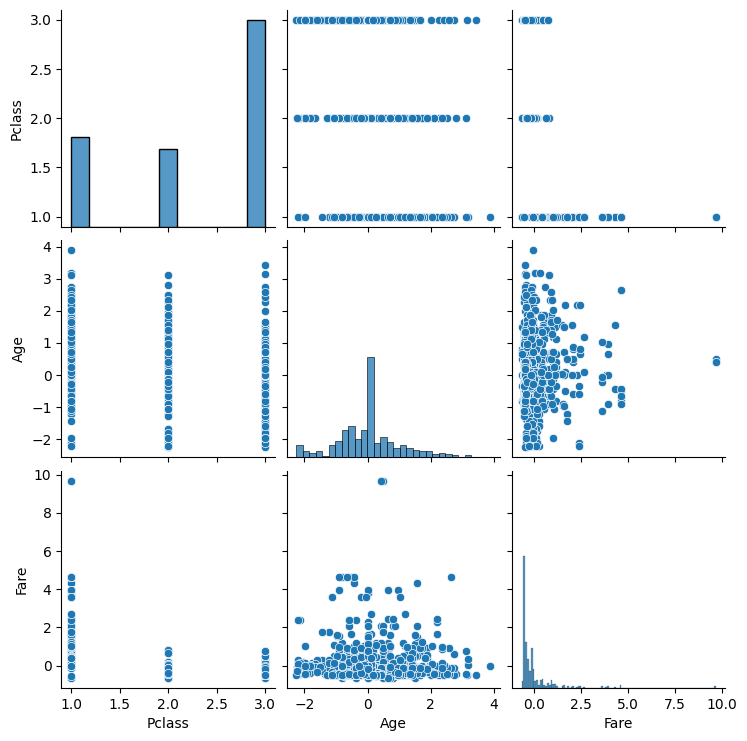

In [21]:
sns.pairplot(X_train, vars=['Pclass', 'Age', 'Fare'])

<Axes: xlabel='Pclass', ylabel='Fare'>

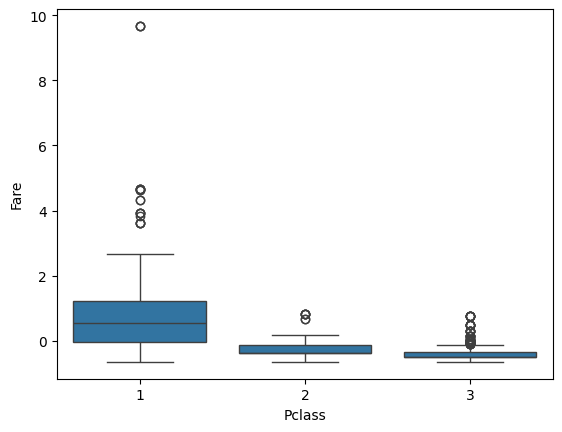

In [22]:
sns.boxplot(x=X_train['Pclass'], y=X_train['Fare'])

<Axes: xlabel='Pclass', ylabel='Age'>

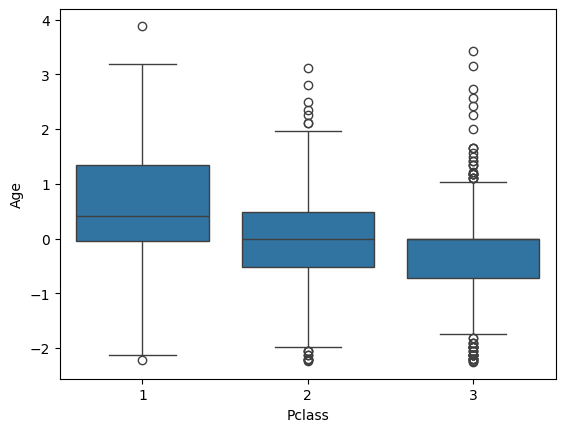

In [23]:
sns.boxplot(x=X_train['Pclass'], y=X_train['Age'])

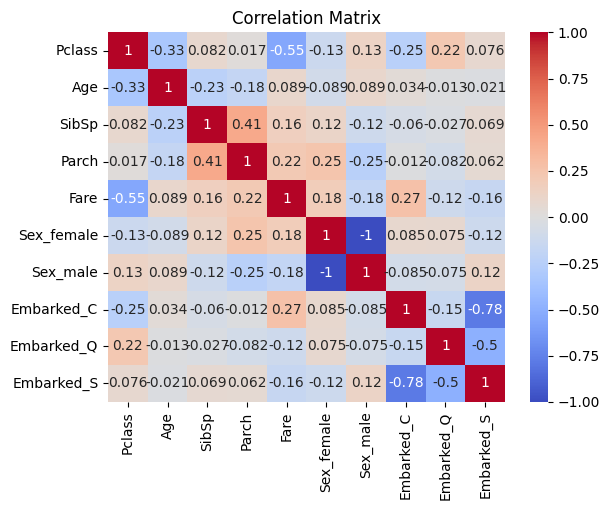

In [24]:
# Correlation analysis on X_train
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Regression

In [25]:
# Considering 'Fare' as the target variable for demonstration.
# Define features (X) and target (y)
X_reg = X_train.drop('Fare', axis=1)
y_reg = X_train['Fare']

# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
y_pred = lr_model.predict(X_test_reg)

# Evaluate the model
mse = mean_squared_error(y_test_reg, y_pred)
r2 = r2_score(y_test_reg, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Error: {r2}")

Mean Squared Error: 0.7064161814361846
R^2 Error: 0.34677266612216306


# SVM

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.83



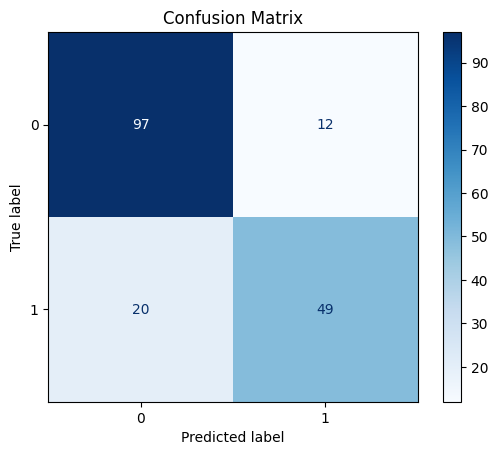

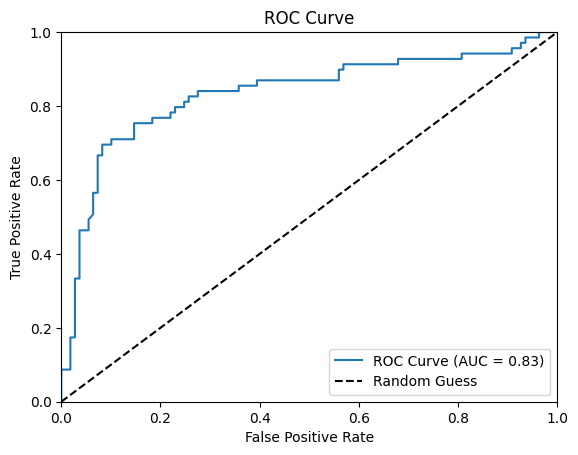


AUC: 0.83

Precision: 0.8032786885245902
Recall: 0.7101449275362319

Cross-validation scores: [0.82022472 0.80337079 0.84831461 0.8258427  0.80225989]
Mean accuracy: 0.82
Standard deviation: 0.02


In [26]:
X_SVM = X_train
y_SVM = y_train

# Split data into training and testing sets
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(
    X_SVM, y_SVM, test_size=0.2, random_state=42
    )

# Initialize the SVM model
svm_model = SVC(probability=True, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']   # Kernel coefficient
}

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_SVM, y_train_SVM)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}\n")

svm_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = svm_model.predict(X_test_SVM)

# Confusion Matrix
cm = confusion_matrix(y_test_SVM, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print('')

# Predict the class probabilities
y_pred_prob = svm_model.predict_proba(X_test_SVM)[:, 1]  # Probability for class 1

### Evaluate the model
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_SVM, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f"\nAUC: {roc_auc:.2f}\n")

# Precision & Recall
precision = precision_score(y_test_SVM, y_pred)
recall = recall_score(y_test_SVM, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}\n")

# K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_model, X_SVM, y_SVM, cv=kf, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard deviation: {np.std(cv_scores):.2f}")

# LDA

In [27]:
# Initialize and fit the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_SVM, y_train_SVM)

# Predict on the test set
y_pred = lda.predict(X_test_SVM)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test_SVM, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       109
           1       0.71      0.75      0.73        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



# Random Forest

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.85


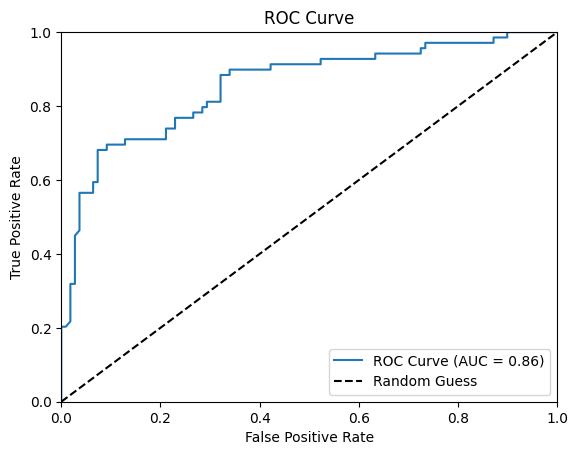


AUC: 0.86

Precision: 0.7205882352941176
Recall: 0.7101449275362319

Cross-validation scores: [0.78089888 0.82022472 0.85955056 0.83707865 0.81920904]
Mean accuracy: 0.82
Standard deviation: 0.03


In [28]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train_SVM, y_train_SVM)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")

# Best model
rf_model = grid_search.best_estimator_

# Make predictions
y_pred = rf_model.predict(X_test_SVM)

# Predict the class probabilities
y_pred_prob = rf_model.predict_proba(X_test_SVM)[:, 1]  # Probability for class 1

### Evaluate the model
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_SVM, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f"\nAUC: {roc_auc:.2f}\n")

# Precision & Recall
precision = precision_score(y_test_SVM, y_pred)
recall = recall_score(y_test_SVM, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}\n")

# K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_SVM, y_SVM, cv=kf, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard deviation: {np.std(cv_scores):.2f}")

# PCA

Explained Variance Ratio: [0.31863085 0.26673893]
Total Explained Variance: 0.59


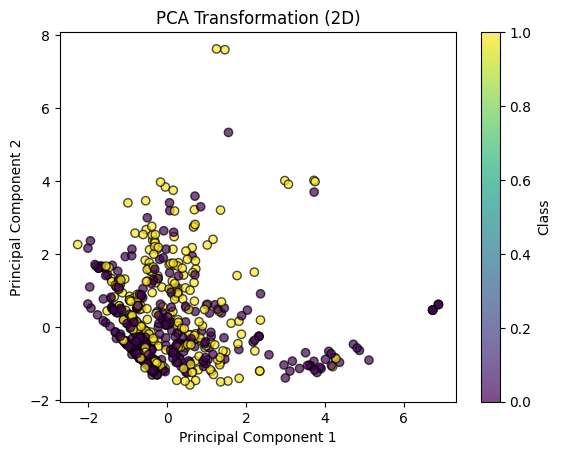

In [29]:
# Initialize PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)

# Fit PCA on the training data and transform both train and test data
X_train_pca = pca.fit_transform(X_train_SVM)
X_test_pca = pca.transform(X_test_SVM)

# Explained variance ratio
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Explained Variance: {sum(pca.explained_variance_ratio_):.2f}")

# Visualize the PCA-transformed data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_SVM, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformation (2D)')
plt.colorbar(label='Class')
plt.show()

# Creating a file for submition

In [30]:
# Training the model on the entire dataset
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")

# Best model
rf_model = grid_search.best_estimator_

# Make predictions
y_pred = rf_model.predict(X_test.drop(columns=['PassengerId']))

df = pd.concat([X_test['PassengerId'], pd.Series(y_pred, name='Survived')], axis=1)
df.to_csv('submission.csv', index=False)
df.head()

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.83


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
